**Proposito da análise:**
- Buscar conforme os dados disponíveis, comportamentos suspeitos.
- Elaborar analise onde é possivel encontrar padrões de fraude, tanto para o pagador quanto recebedor.

**Preparando dados para análise**
- CSV com dados foi lido e criado dataframe com Pandas
- Tabela temporária como View para manipular em SQL foi criada com Spark.

In [0]:
#importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


#Lendo arquivo csv
csv = "https://raw.githubusercontent.com/felipe-de-castro/RiskTransactionsAnalysis/main/transactioncontentsdata.csv"
df = pd.read_csv(csv)

#Gerando Dataframe em spark/ tabela temporaria para SQL
spark_df = spark.createDataFrame(df)
spark_df.createOrReplaceTempView("transactions")

In [0]:
#Tratando a coluna transaction date e criando uma coluna de dias da semana:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# create a new column with the weekday name
df['weekday'] = df['transaction_date'].apply(lambda x: x.strftime('%A'))

**Analise métrica de desempenho do negócio**
- Ticket médio de transação (com e sem CBK) é de R$ 672,33.
- Ticket médio de transações com CBK: R$ 1453,58

In [0]:
%sql
select
  "ticket médio" as tipo
  ,avg(transaction_amount) as amount
  ,'' as porcentagem
from transactions
union 
select
  "ticket médio chargeback" as tipo
  ,avg(transaction_amount) as amount
  ,count(1)/(select count(1) from transactions)*100 as porcentagem
from transactions
where has_cbk = 'true'
union 
select
  "ticket médio completed" as tipo
  ,avg(transaction_amount) as amount
  ,count(1)/(select count(1) from transactions)*100 as porcentagem
from transactions
where has_cbk = 'false'


tipo,amount,porcentagem
ticket médio,767.8129040325103,
ticket médio chargeback,1453.5719181585678,12.222569552985307
ticket médio completed,672.3243803418803,87.7774304470147


**Analise focada no quantitativo e valores de Chargeback**

- Merchants com os maiores valores de CBK
- Merchants com as maiores quantidades de CBK
- Payer com os maiores valores de CBK
- Payer com as maiores quantidades de CBK

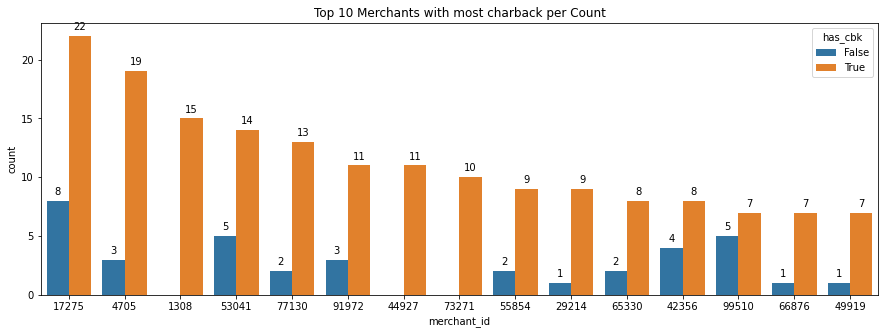

In [0]:
# Filter the dataframe to include only rows where has_cbk is true
df_cbk = df[df['has_cbk'] == True]

# Get the top 5 merchant_id with has_cbk = true
top_merchants = df_cbk['merchant_id'].value_counts().nlargest(15).index.tolist()

# Filter the dataframe to include only rows where merchant_id is in the top 5 and has_cbk is true or false
df_top_merchants = df[df['merchant_id'].isin(top_merchants) & df['has_cbk'].isin([True, False])]

#figure size
plt.figure(figsize=(15,5))

#Title of the graph
plt.title('Top 10 Merchants with most charback per Count')

# Create the bar graph
sns_plot = sns.countplot(x='merchant_id', hue='has_cbk', data=df_top_merchants, order=top_merchants)

# Add labels to each bar
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points');

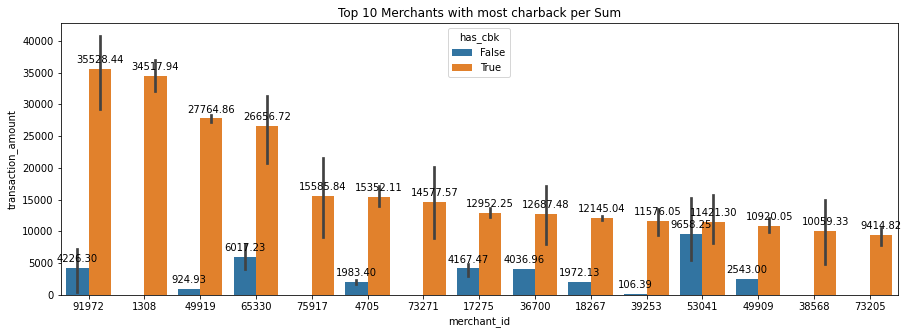

In [0]:
# Get the top 5 merchant_id with has_cbk = true
top_merchants = df_cbk.groupby(['merchant_id'])['transaction_amount'].sum().nlargest(15).index.tolist()

# Filter the dataframe to include only rows where merchant_id is in the top 5 and has_cbk is true or false
df_top_merchants = df[df['merchant_id'].isin(top_merchants) & df['has_cbk'].isin([True, False])]

# Modify the Figure size
plt.figure(figsize=(15,5))

#Title of the graph
plt.title('Top 10 Merchants with most charback per Sum')

# Create the bar graph
sns_plot = sns.barplot(x='merchant_id', y='transaction_amount', hue='has_cbk', data=df_top_merchants, estimator=sum, order=top_merchants)

# Add labels to each bar
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points');

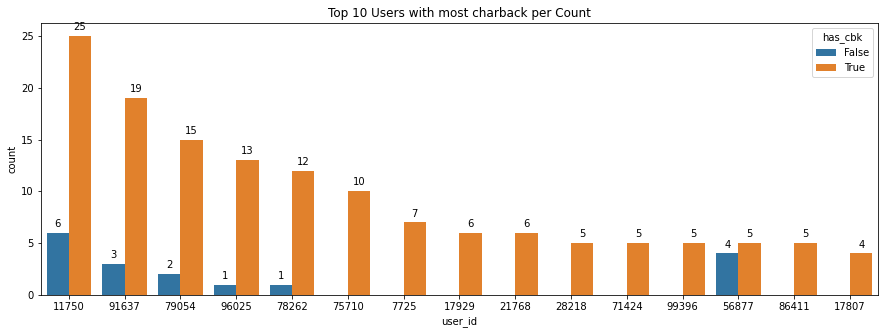

In [0]:
# Filter the dataframe to include only rows where has_cbk is true
df_cbk = df[df['has_cbk'] == True]

# Get the top 5 merchant_id with has_cbk = true
top_users = df_cbk['user_id'].value_counts().nlargest(15).index.tolist()

# Filter the dataframe to include only rows where merchant_id is in the top 5 and has_cbk is true or false
df_top_users = df[df['user_id'].isin(top_users) & df['has_cbk'].isin([True, False])]

#figure size
plt.figure(figsize=(15,5))

#Title of the graph
plt.title('Top 10 Users with most charback per Count')

# Create the bar graph
sns_plot = sns.countplot(x='user_id', hue='has_cbk', data=df_top_users, order=top_users)

# Add labels to each bar
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points');

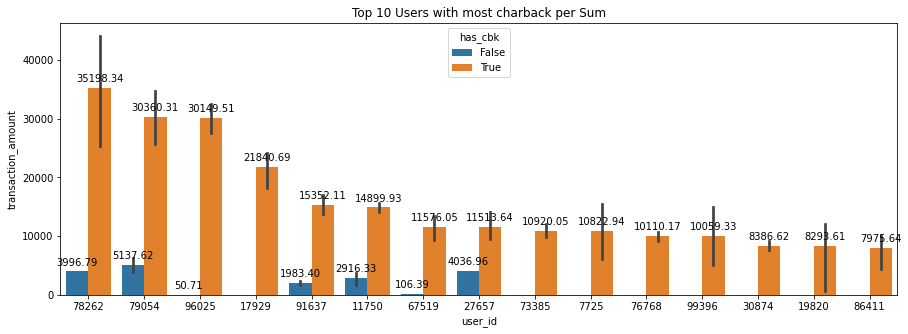

In [0]:
# Get the top 5 merchant_id with has_cbk = true
top_users = df_cbk.groupby(['user_id'])['transaction_amount'].sum().nlargest(15).index.tolist()

# Filter the dataframe to include only rows where merchant_id is in the top 5 and has_cbk is true or false
df_top_users = df[df['user_id'].isin(top_users) & df['has_cbk'].isin([True, False])]

# Modify the Figure size
plt.figure(figsize=(15,5))

#Title of the graph
plt.title('Top 10 Users with most charback per Sum')

# Create the bar graph
sns_plot = sns.barplot(x='user_id', y='transaction_amount', hue='has_cbk', data=df_top_users, estimator=sum, order=top_users)

# Add labels to each bar
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points');

**Análise sobre distribuição de chargeback por Dia da Semana.**

In [0]:
#Duvida sobre utilizar boxplot ou scatter

#plt.figure(figsize=(10,5))
#sns.boxplot(data=df_cbk, x='weekday', y='transaction_amount')



Out[59]: <matplotlib.legend.Legend at 0x7f8245cf76a0>

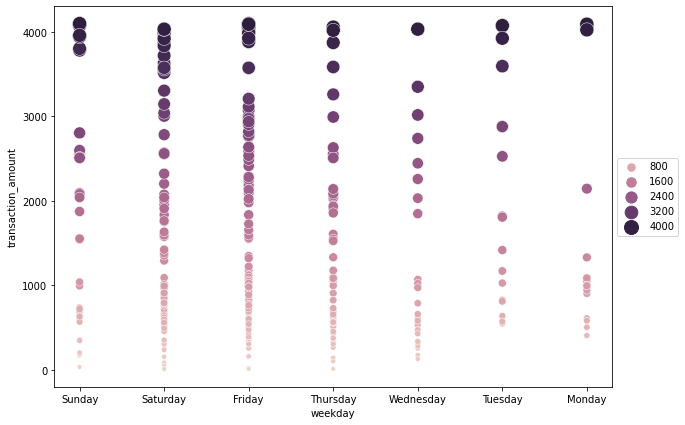

In [0]:
# Relação da distruição de chargeback por Dia da Semana.
plt.figure(figsize=(10,7))
ax = sns.scatterplot(data=df_cbk, x='weekday', y='transaction_amount', hue='transaction_amount', 
                size='transaction_amount',
               sizes=(20, 200));

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Relação de distribuição de chargeback por periodo do dia.**

Ao analisar a ocorrencia de distribuição dos chargeback por hora durante o dia, foi possivel identificar periodo Vespertino e Norturno são os horário com as maior ocorrencia de fraude. </br>
Sendo assim, podemos observar que tais períodos são aqueles que possuem maior intenção de fraude e vunerabilidade.

<command-2036127121810916>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cbk['hour'] = pd.to_datetime(df_cbk['transaction_date']).dt.hour


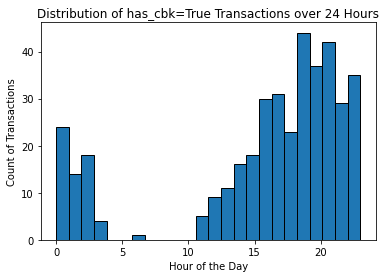

In [0]:
# Measuring the distribution of transaction per hour of the day.
# It shows which part of the day the frauds occur


df_cbk = df[df['has_cbk'] == True]

# Extract the hour information from the 'transaction_date' column and create a new column to store it
df_cbk['hour'] = pd.to_datetime(df_cbk['transaction_date']).dt.hour

# Create a histogram using the hour information as the x-axis and the count of rows as the y-axis
plt.hist(df_cbk['hour'], bins=24, edgecolor='black')

# Label the plot axis and title for better understanding
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Transactions')
plt.title('Distribution of has_cbk=True Transactions over 24 Hours');

**Avaliando o comportamento do user_id em relação a alternância de dispositivo.**

Nesta análise busca-se averiguar o comportamento do user por dia de uso, onde é possivel identificar a possibilidade de alternancia de dispostivo para realizar transações e posteriomente contestá-la.</br>
A ideia é o user_id possa estar agindo de má-fé, acreditando que ao realizar tal alternancia estária 'driblando' a verificação de fraude cruzando com seu identificador.

In [0]:
 %sql

-- Avaliando comportamento do USER_ID em relação a alternância de dispositivos.

with cte as (
SELECT 
  user_id 
  ,DATE(transaction_date) 
  ,device_id 
  ,SUM(CASE WHEN device_id != lag(device_id) OVER (PARTITION BY user_id, date(transaction_date)  ORDER BY transaction_date asc) THEN 1 ELSE 0 END) 
        OVER (PARTITION BY user_id, date(transaction_date) ORDER BY transaction_date ) + 1 AS device_sequence 
FROM 
  transactions
  where 1=1
  and has_cbk = 'true'
  --ORDER BY 
  --date(transaction_date) asc 
  -- device_sequence

)
  select
    user_id, transaction_date, device_id, device_sequence
  from cte
  where user_id in (11750) --TESTING WITH UM USER_ID
  --order by devices_perday desc
;
--  (11750)
-- (78262, 79054, 96025, 17929, 91637, 11750, 67519, 27657, 73385, 7725)
-- https://stackoverflow.com/questions/60627676/how-to-use-countdistinct-using-a-window-function-in-spark-scala

user_id,transaction_date,device_id,device_sequence
11750,2019-11-22,542535.0,1
11750,2019-11-23,670695.0,1
11750,2019-11-23,542535.0,2
11750,2019-11-25,670695.0,1
11750,2019-11-25,542535.0,2
11750,2019-11-26,542535.0,1
11750,2019-11-27,342890.0,1
11750,2019-11-27,542535.0,2
11750,2019-11-28,342890.0,1
11750,2019-11-28,542535.0,2


Databricks visualization. Run in Databricks to view.

**Avaliando o risco por quantidade de cartões utilizados**

Gerando um parametro de validação de risco por quantidade de cartões por usuario e no dia de uso, independente do merchant. </br>
Assim, mesmo que tenha feito diversos pagamentos para dois merchants, utilizando 6 cartões (3 para cada merchant), acusaria um índice alto de insegurança.

In [0]:
 %sql

with cte as (
SELECT 
  merchant_id
  ,user_id
  ,DATE(transaction_date) 
  ,card_number 
  ,case 
    when count(card_number) over (partition by user_id, DATE(transaction_date)) <= 2 then 'low'
    when  count(card_number) over (partition by user_id, DATE(transaction_date)) <=4 then 'mid'
    when  count(card_number) over (partition by user_id, DATE(transaction_date)) <= 5 then 'high'
    when  count(card_number) over (partition by user_id, DATE(transaction_date)) >=6 then 'extra'
    end range_alert_cards   
FROM 
  transactions
  where 1=1
  and has_cbk = 'true'

)
  select
    *
  from cte
  where 1=1
  --and merchant_id in (65330) -- 
  -- and user_id in (78262) -- HIGH EVEN IF USER PAYED ANOTHER MERCHANT.
  --order by devices_perday desc
;


merchant_id,user_id,transaction_date,card_number,range_alert_cards
53041,900,2019-11-22,412177******1138,low
92895,2708,2019-12-01,444456******4210,low
62194,3157,2019-12-01,535081******2584,low
55854,3584,2019-11-27,544731******9913,mid
55854,3584,2019-11-27,544731******7164,mid
55854,3584,2019-11-27,544731******7164,mid
55854,3584,2019-11-27,544731******7164,mid
38337,4651,2019-11-22,230744******4802,low
38337,4651,2019-11-22,230744******4802,low
63050,4651,2019-11-29,606282******4880,low


Databricks visualization. Run in Databricks to view.

**Conclusão**

Dados a considerar para melhoria da análise: 
- **Geolocalização do user_id**: a habilitação da localização durante uma transação traria uma possibilidade de averiguar se há um comportamento fraudulento como ATO, mobile theft, account sharing. Padrão de pagamento e local.
- **Tipo de dispositivo**: Apple, Android -Se possível, modelo e marca. </br>Ao captar essas informações originais do user, seria avaliado o comportamento de troca de dispositivo ou mesmo a ocorrência de devide spoofing (ferramenta que gera software/hardware de um dispositivo para enganar).

Sugestões: 
- Limitar a frequência de trocar de dispositivos por dia como forma preventiva.
- Realizar análise individual do merchant caso receba valores fora do padrão e cumulativamente de user_ids com inserções elevadas de cartões para que possa haver uma restrição.
- Restringir que o mesmo dispositivo seja utilizado por diversos user_ids .